In [10]:
import string
from collections import Counter

import matplotlib.pyplot as plt
import string

from collections import Counter


from nltk.corpus import stopwords

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize

import nltk

In [11]:
def get_tweets():
    import GetOldTweets3 as got
    tweetCriteria=got.manager.TweetCriteria().setQuerySearch('Corona Virus') \
    .setSince("2020-03-15") \
    .setUntil("2020-08-14") \
    .setMaxTweets(100)
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [12]:
text = ""
text_tweets = get_tweets()

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text


lower_case = text.lower()

cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

tokenized_words = cleaned_text.split()


In [5]:
text_tweets

[['Florida is a coronavirus hotspot, yet a sheriff banned face masks in his office - news - Armstrong MyWire https://www.armstrongmywire.com/news/read/article/bgr-florida_is_a_coronavirus_hotspot_yet_a_sheriff_ban-rpenskemc/category/news#.XzXTYXqJ_1s.twitter What kind of otherworldly morons elected this super idiot to be their sheriff??? '],
 ['"CDC issues warning for the fall if COVID-19 measures aren\'t followed" https://twitter.com/i/events/1293951751465271301 #coronavirus #health #medical #COVID19 #BePrepared #BeInformed #ActualFacts #WearADamnMask #StayHomeSaveLives #StayTheFHome #WashYourHands'],
 ["We, residents of the city of Mosul, suffer from a great lack of oxygen in hospitals due to Corona virus 19. Help us spread this hashtac. You may contribute to saving a person's life. #الموصل_تختنق"],
 ['Mi hermana se larga a llorar xq dice que no se va a recibir por el coronavirus'],
 ['Doctors lay out plan to ‘punish’ people who refuse coronavirus vaccine: ‘There is no alternative’ |

In [7]:
stop_words = ["is", "his", "of", "this", "to", "for", "of", "We", "the", "from", "in", "us",
              "se", "a", "que", "no", "se", "va", "her", "on","de", "en", "out", "who",
              "on", "de", "not", "it", "This", "and", "Has", "won't", "get", "as", "el", "La",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "during", "total", "some", "up", "How", "him", "maybe", "stop", "&", "gave", "we", "who", "it's","can",
              "be","we","down","or","you","not","some"]

final_words = [word for word in tokenized_words if word not in stop_words]

In [8]:
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)


Counter({' happy': 2, ' fearful': 1, ' lost': 1, ' sad': 1})


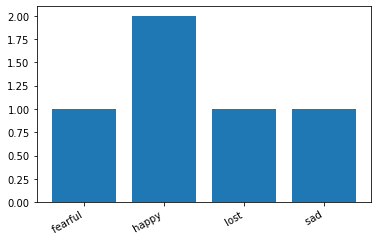

In [9]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()